In [15]:
from qiskit import IBMQ
# IBMQ.delete_accounts()
# IBMQ.save_account('e153ef2c9fcbf4386146420a0f058b17a4e8ef7417858314f250ebd838c6005706f37ef2130d8de300636069cb9b3c596a70bc5b7d0b62999a116ac3be8c1b95')
# IBMQ.load_accounts()
from qiskit.compiler import transpile


In [9]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram
# from qiskit.tools.monitor import job_monitor

import math
import time
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

# Variables
pi = np.pi

In [21]:
def ccr(alpha,theta,c1,c2,u,qc,n): # control-control-rotation gate gate
    
    pi = np.pi
    sim = QuantumRegister(n,'sim')
    # alpha is x,y,z. u is qubit that u acts on. c_1,c_2 are the control locations
    if alpha == 'x':
        qc.cu3(theta/2,-pi/2,pi/2,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu3(-theta/2,-pi/2,pi/2,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu3(theta/2,-pi/2,pi/2,sim[c1],sim[u])
    elif alpha == 'y':
        qc.cu3(theta/2,0,0,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu3(-theta/2,0,0,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu3(theta/2,0,0,sim[c1],sim[u])
    else:
        qc.cu1(theta/2,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu1(-theta/2,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu1(theta/2,sim[c1],sim[u])
    
    

def scs(x,y,qc,n): # s is starting qubit, qc is quantum circuit
    sim = QuantumRegister(n,'sim')
    for i in range(1,y+1):
        if i == 1:
            qc.cx(sim[x-1-i],sim[x-1])
            qc.cu3(2*math.acos(math.sqrt(i/x)),0,0,sim[x-1],sim[x-1-i])
            qc.cx(sim[x-1-i],sim[x-1])
        else:
            qc.cx(sim[x-1-i],sim[x-1])
            ccr('x',2*math.acos(math.sqrt(i/x)),x-1,x-i,x-1-i,qc,n)
            qc.cx(sim[x-1-i],sim[x-1])
            

def Dicke(n,k):
    
    # Create circuit
    sim = QuantumRegister(n,'sim')
    meas = ClassicalRegister(n,'meas')
    circ = QuantumCircuit(sim, meas)
    
    # Prepare initial bit string
    for i in range(n-1,n-k-1,-1):
        circ.x(sim[i])
    
    for l in range(n,k,-1):
        scs(l,k,circ,n)
    for l in range(k,1,-1):
        scs(l,l-1,circ,n)
        
    # Measure
    circ.measure(sim,meas)
    
    trans = transpile(circ, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=3)

    return trans.draw(output='mpl')

    # Draw
    return circ.draw(output = 'mpl')

    # Simulate
    shots = 2000
    backend = Aer.get_backend('qasm_simulator')
    sim = execute(circ, backend, shots = shots)
    result = sim.result()
    counts = result.get_counts(circ)
    return plot_histogram(counts)

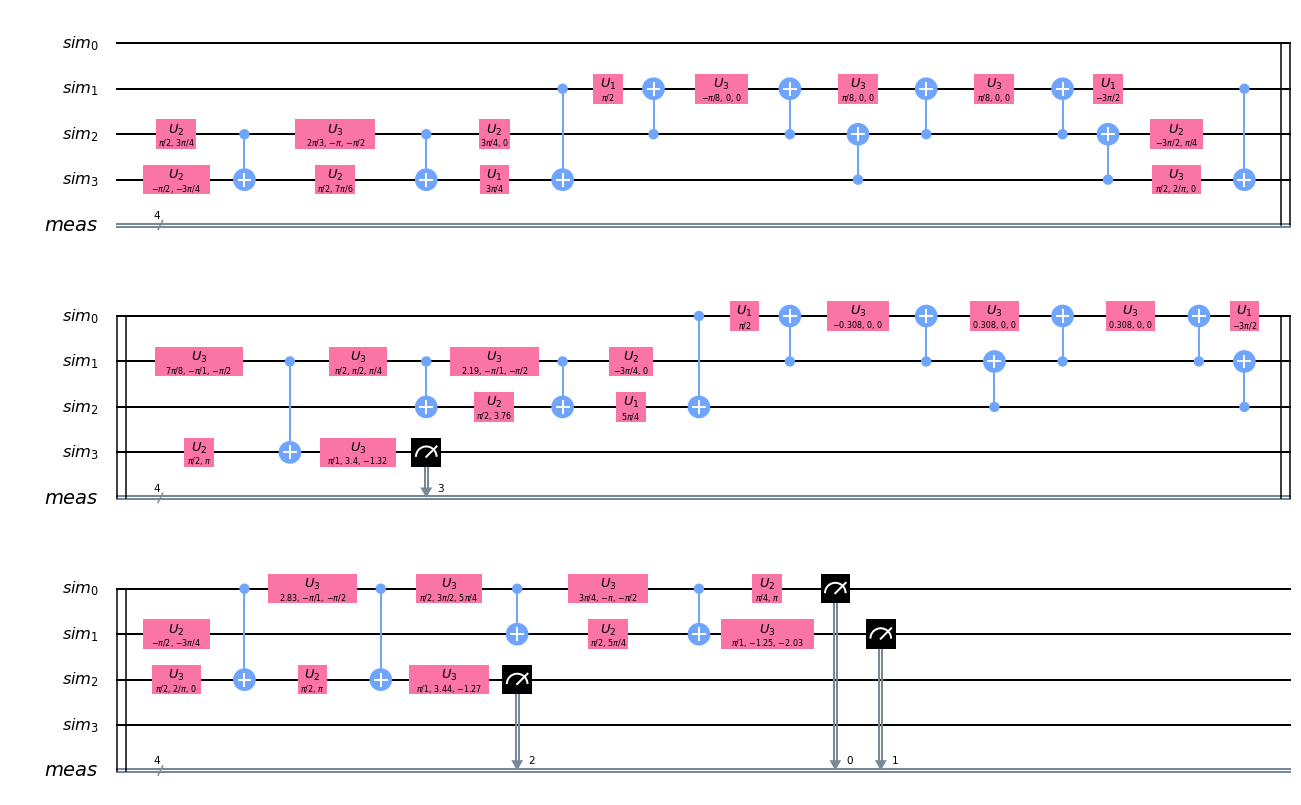

In [23]:
Dicke(4,2)

In [42]:
def ccr(alpha,theta,c1,c2,u,qc): # control-control-rotation gate gate
    
    pi = np.pi
    sim = QuantumRegister(3,'sim')
    circ = QuantumCircuit(sim)
    # alpha is x,y,z. u is qubit that u acts on. c_1,c_2 are the control locations
    if alpha == 'x':
        qc.cu3(theta/2,-pi/2,pi/2,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu3(-theta/2,-pi/2,pi/2,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu3(theta/2,-pi/2,pi/2,sim[c1],sim[u])
    elif alpha == 'y':
        qc.cu3(theta/2,0,0,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu3(-theta/2,0,0,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu3(theta/2,0,0,sim[c1],sim[u])
    else:
        qc.cu1(theta/2,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu1(-theta/2,sim[c2],sim[u])
        qc.cx(sim[c1],sim[c2])
        qc.cu1(theta/2,sim[c1],sim[u])

In [6]:
sim = QuantumRegister(3,'sim')
circ = QuantumCircuit(sim)
ccr('x',2*pi,0,1,2,circ)
# Draw
circ.draw(output = 'mpl') 

TypeError: ccr() missing 1 required positional argument: 'n'